# MNIST Handwritten Digit Recognition

The MNIST is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on handwritten digit classification problem.
Dataset was constructed from a number of scanned documents and available from NIST (National Institute of Standards and Technology.). This is where the name of the dataset comes from, as the Modified NIST (MNIST).

Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developers to focus on the machine learning / deep learning with very little data cleaning and preparation required.

Each image is a 28 by 28 pixels square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

This is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

1. Define model (specify diff layers)
2. Compile model (1. loss function 2. Optimization (reduce loss and improve accuracy), 3. evaluation matrix)
3. Fit Model (giving training data to model and then predict on test data)
4. Make predictions

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [4]:
# import libraries
from keras.datasets import mnist # mnist is class of
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten # Dense is fully connected layer, outlier can be dropped out, and flatten data
from keras.layers import Conv2D, MaxPooling2D # conventional 2D layer, pooling layer
from tensorflow.keras.optimizers import Adam  # try to improve perfroamce using Adam
from keras import backend as K                #  
from tensorflow.keras.utils import to_categorical #  classes to multiple
from matplotlib import pyplot as plt

### Load the data

The Keras library provides a convenience method for loading the MNIST dataset. The dataset is downloaded automatically the first time this function is called and is stored in Home directory in ~/.keras/datasets/mnist.pkl.gz as a 15MB file.

In [5]:
# Split data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 33s 3us/step
(60000, 28, 28) (60000,)


It appears that there are 60000 images in train data, and the images are 28 pixels x 28 pixels each. We can confirm by plotting first sample:

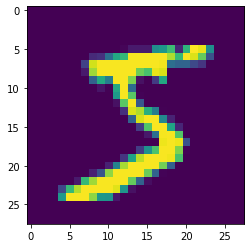

In [6]:
plt.imshow(x_train[0])

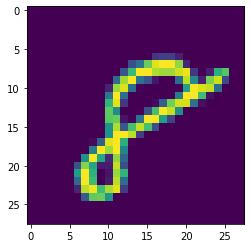

In [8]:
plt.imshow(x_train[59999])

### Process data

We want to transform our dataset from having shape (n, width, height) to (n, widht, height, depth)

In [12]:
x_train.shape[0]
x_test.shape[0]

10000

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
# we are going to use B&W images, that's why taking depth as 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28,28,1)

In [15]:
# to confirm, we can print X_train's dimensions again:
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


The pre-processing step for the input data is to convert our data type to float32 and normalize our data values to the range [0,1]

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [18]:
# Next, let's take a look at the shape of our class label data:
print(y_train.shape)

# min max normalization = dividing with min and max values


(60000,)


We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array

In [19]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [20]:
print(y_train.shape)

(60000, 10)


In [21]:
batch_size = 128        # at a time 128 images are fitted
epochs = 5              # iterations
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=input_shape))  # first layer, 32- num of filters (multi of 8), kernel=filter size, relu gives output 1 or 0
model.add(Conv2D(64,(3,3), activation='relu'))     # second layer
model.add(MaxPooling2D(pool_size=(2,2)))           # down-sampling image to 2x2
model.add(Dropout(0.25))                           # 25% outliers are removed (most of the time less than 50%)
model.add(Flatten())
model.add(Dense(256, activation='relu'))            # Dense layer gives intermediate output
model.add(Dropout(0.5))                            # 50% drop
model.add(Dense(num_classes, activation='softmax')) # multiclass output that's why softmax. If binary classification, apply sigmoid

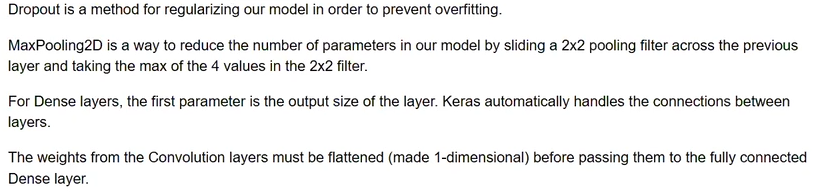

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

### Compile model

In [23]:
import keras
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

When we compile the model, we declare the loss function and the optimizer

### Fit data to Model

In [24]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("The model is trained successfully.")

# saving model
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/5
469/469 [==============================] - 177s 373ms/step - loss: 0.1908 - accuracy: 0.9416 - val_loss: 0.0516 - val_accuracy: 0.9837
Epoch 2/5
469/469 [==============================] - 177s 377ms/step - loss: 0.0639 - accuracy: 0.9810 - val_loss: 0.0334 - val_accuracy: 0.9890
Epoch 3/5
469/469 [==============================] - 170s 362ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0323 - val_accuracy: 0.9894
Epoch 4/5
469/469 [==============================] - 169s 359ms/step - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.0276 - val_accuracy: 0.9914
Epoch 5/5
469/469 [==============================] - 167s 356ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0291 - val_accuracy: 0.9909
The model is trained successfully.
Saving the model as mnist.h5


C:\Users\hpanc\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


When there is higher difference in training accuracy and validation accuracy, we can say model is overfitted. Means model has not understood your data properly. Training accuracy is higher but validation accuracy is lower.

### Evaluate Model

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.029103677719831467
Test accuracy:  0.9908999800682068


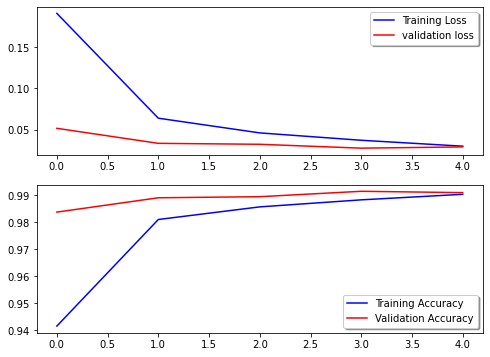

In [26]:
fig, ax = plt.subplots(2,1, figsize=(8,6)) # 2 rows, single column
ax[0].plot(hist.history['loss'], color='b', label='Training Loss')
ax[0].plot(hist.history['val_loss'], color='r', label='validation loss', axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label='Training Accuracy')
ax[1].plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')

legend = ax[1].legend(loc='best', shadow=True)

### Make Predictions

313/313 [==============================] - 7s 22ms/step


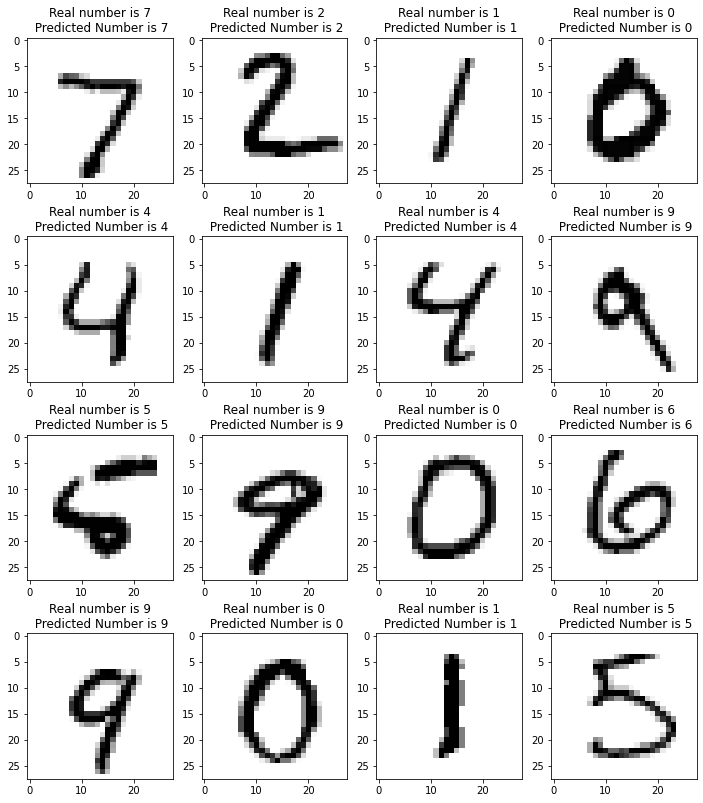

In [29]:
y_pred = model.predict(x_test)

X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4,4, figsize=(12,14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title= f'Real number is {y_test[i].argmax()}\n Predicted Number is {y_pred[i].argmax()}')

Other datasets
- CIFAR-10 image classification
- CIFAR-100